# Something about the data

__Style - style of a beer__ ( this is the thing to predict )

OG - Specific gravity of wort before fermentation

FG - Specific gravity of wort after fermentation

ABV - Alcohol By Volume

IBU - International Bittering Units

Color - Standard Reference Method - light to dark ex. 40 = black

BoilGravity - Specific gravity of wort before the boil

PitchRate - Yeast added to the fermentor per gravity unit - M cells/ml/deg P

Efficiency - Beer mash extraction efficiency - extracting sugars from the grain during mash

UserId - ID of Brewer's Friend user who shared data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import confusion_matrix, precision_score
from sklearn.metrics import recall_score, f1_score, accuracy_score

In [2]:
data = pd.read_csv('data/beers.csv')

In [3]:
data.head()

,Name,Style,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,PitchRate,Efficiency,UserId
0,Black Betty,Stout,1.069,1.007,8.12,0.00,30.48,60,NaN,NaN,75.0,NaN
1,Leon's Tail Red Ale,Ale,1.064,1.012,6.80,9.36,9.85,60,1.132,0.50,35.0,NaN
2,Coya's Bad Dog Chocolate Stout swedish,Stout,1.061,1.015,6.08,28.31,35.83,60,1.044,0.35,83.0,42087.0
3,American Pale Ale,Ale,1.053,1.012,5.44,46.48,5.77,60,1.033,NaN,70.0,NaN
4,GDB Pils,Lager,1.053,1.017,4.64,42.29,4.22,90,1.039,0.50,77.0,14729.0


In [4]:
data.isna().sum()

Name               0
Style              0
OG                 0
FG                 0
ABV                0
IBU                0
Color              0
BoilTime           0
BoilGravity     1512
PitchRate      22720
Efficiency         0
UserId         29482
dtype: int64

In [5]:
#Pitch rate and UserId are not useful due to many missing values
#or overall uselessness in designing model that predicts beer style
data.drop(['UserId', 'PitchRate', 'Name'], axis=1, inplace=True)
data.head()

,Style,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency
0,Stout,1.069,1.007,8.12,0.00,30.48,60,NaN,75.0
1,Ale,1.064,1.012,6.80,9.36,9.85,60,1.132,35.0
2,Stout,1.061,1.015,6.08,28.31,35.83,60,1.044,83.0
3,Ale,1.053,1.012,5.44,46.48,5.77,60,1.033,70.0
4,Lager,1.053,1.017,4.64,42.29,4.22,90,1.039,77.0


In [6]:
data.shape

(42879, 9)

In [7]:
# Clearing data from entries with missing values
data = data.dropna()
data.shape

(41367, 9)

In [8]:
data.describe()

,OG,FG,ABV,IBU,Color,BoilTime,BoilGravity,Efficiency
count,41367.000000,41367.000000,41367.000000,41367.000000,41367.000000,41367.000000,41367.00000,41367.000000
mean,1.061100,1.013964,6.193556,50.196978,14.081651,64.962676,1.05384,66.219693
std,0.016871,0.005149,1.735526,44.589511,12.801189,13.426453,0.02604,13.990237
min,1.000000,0.999000,0.000000,0.000000,0.000000,0.000000,1.00000,0.000000
25%,1.051000,1.011000,5.180000,27.890000,5.380000,60.000000,1.04100,65.000000
50%,1.058657,1.013000,5.910000,40.930000,8.260000,60.000000,1.04800,70.000000
75%,1.068000,1.016000,6.880000,63.445000,17.590000,60.000000,1.05800,75.000000
max,1.500000,1.156000,54.720000,3409.300000,50.000000,240.000000,1.50000,100.000000


In [9]:
data.describe(include=['O'])

,Style
count,41367
unique,7
top,Ale
freq,14523


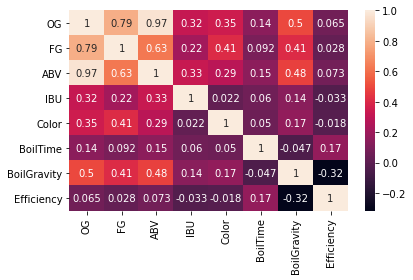

In [10]:
#Coleration
sns.heatmap(data.corr(), annot=True)
plt.tight_layout()

In [11]:
# Lets what color have to do with style of beer
data[['Style', 'Color']].groupby(['Style'], as_index=False).mean().sort_values(by='Color', ascending=False)

,Style,Color
5,Stout,39.577584
3,Porter,33.342211
0,Ale,10.637899
1,IPA,9.767423
2,Lager,7.980793
4,Saison,6.569804
6,Witbier,4.543633


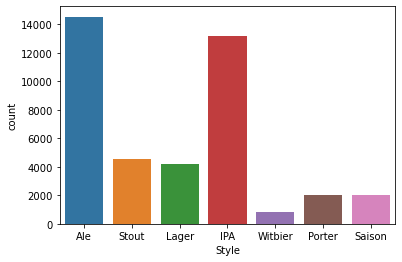

In [12]:

sns.countplot(data['Style'])

In [13]:
Y = data['Style'].values

In [14]:
data.drop(['Style'], axis=1, inplace=True)

In [15]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41367 entries, 1 to 42878
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   OG           41367 non-null  float64
 1   FG           41367 non-null  float64
 2   ABV          41367 non-null  float64
 3   IBU          41367 non-null  float64
 4   Color        41367 non-null  float64
 5   BoilTime     41367 non-null  int64  
 6   BoilGravity  41367 non-null  float64
 7   Efficiency   41367 non-null  float64
dtypes: float64(7), int64(1)
memory usage: 4.1 MB


In [16]:
# Division to trian and test data
X = data.values
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2)

In [17]:
# AI Model
model = DecisionTreeClassifier(random_state=23215)
model.fit(X_train,y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=23215, splitter='best')

In [18]:
def calculate_metrics(training_model,X_test,y_test):
    pred = model.predict(X_test)
    cm = confusion_matrix(y_test, pred)
    acc = accuracy_score(y_test, pred)
#     precision = precision_score(y_test, pred)
#     recall = recall_score(y_test, pred)
#     f_score = f1_score(y_test, pred)
    print(f'Accuracy {acc}')
    return cm

In [19]:
cm = calculate_metrics(model, X_test, y_test)

Accuracy 0.5621223108532754


In [20]:
max_depths = [2*x for x in range(1,9)]
for max_depth in max_depths:
    model = DecisionTreeClassifier(max_depth=max_depth, random_state=23215)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train) 
    test_pred = model.predict(X_test)
    print('Model params: max_depth:{}'.format(max_depth))
    print('Train_acc: {}\tTest_acc: {}'.format(accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)))

Model params: max_depth:2
Train_acc: 0.6286525851388511	Test_acc: 0.6154218032390621
Model params: max_depth:4
Train_acc: 0.643942827788354	Test_acc: 0.6329465796470872
Model params: max_depth:6
Train_acc: 0.66325204726075	Test_acc: 0.6476915639352188
Model params: max_depth:8
Train_acc: 0.687607651164899	Test_acc: 0.6537345902828137
Model params: max_depth:10
Train_acc: 0.7149246064122322	Test_acc: 0.6515591007976794
Model params: max_depth:12
Train_acc: 0.7537545704529659	Test_acc: 0.6439448875997099
Model params: max_depth:14
Train_acc: 0.8005318345269392	Test_acc: 0.6288373217307227
Model params: max_depth:16
Train_acc: 0.8475206236968543	Test_acc: 0.6150592216582065


In [21]:
min_samples_splits = [5*x for x in range(1,15,2)]
for min_sample in min_samples_splits:
    model = DecisionTreeClassifier(min_samples_split=min_sample, random_state=23215)
    model.fit(X_train, y_train)
    train_pred = model.predict(X_train)
    test_pred = model.predict(X_test) 
    print('Model param: min_samples_split:{}'.format(min_sample))
    print('Train_acc: {}\tTest_acc: {}'.format(accuracy_score(y_train, train_pred), accuracy_score(y_test, test_pred)))

Model param: min_samples_split:5
Train_acc: 0.9250596802949265	Test_acc: 0.5714285714285714
Model param: min_samples_split:15
Train_acc: 0.8227419696008219	Test_acc: 0.5947546531302876
Model param: min_samples_split:25
Train_acc: 0.7825219835010425	Test_acc: 0.6099830795262268
Model param: min_samples_split:35
Train_acc: 0.7600398875895205	Test_acc: 0.6206188058979937
Model param: min_samples_split:45
Train_acc: 0.7455353095820868	Test_acc: 0.6278704375151075
Model param: min_samples_split:55
Train_acc: 0.7356842836853715	Test_acc: 0.6325839980662316
Model param: min_samples_split:65
Train_acc: 0.7272534977185507	Test_acc: 0.6376601401982113


In [22]:
# Tworzymy słownik z różnymi wartościami dla parametrów
parameters = {'criterion': ['entropy', 'gini'],
              'min_samples_split': [5*x for x in range(1,15,2)],
              'min_samples_leaf': [2*x+1 for x in range(14)],
              'max_leaf_nodes': [2*x for x in range(1, 9)],
              'max_depth': [2*x for x in range(1,9)]}

In [23]:
grid_search = GridSearchCV(DecisionTreeClassifier(random_state=23215), param_grid=parameters, cv=3)
# We search through to find the best params
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=23215,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['entropy', 'gini'],
                  

In [24]:
# Display best params
print(grid_search.best_params_)

{'criterion': 'gini', 'max_depth': 8, 'max_leaf_nodes': 16, 'min_samples_leaf': 1, 'min_samples_split': 5}


In [25]:

# Lets see how good did it do
best_model = DecisionTreeClassifier(**grid_search.best_params_)
best_model.fit(X_train, y_train)

cm = calculate_metrics(best_model, X_test, y_test)

Accuracy 0.6376601401982113
